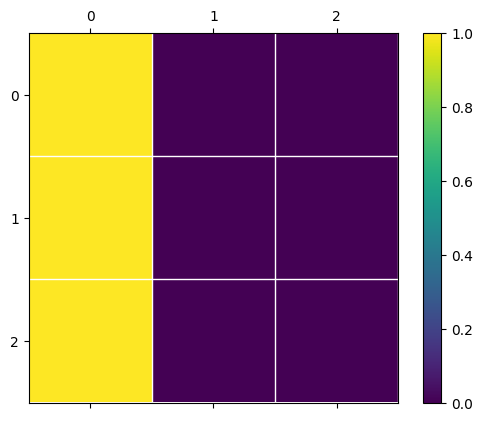

In [3]:

import matplotlib.pyplot as plt


def visualize_large_grid(grid):
    rows = len(grid)
    cols = len(grid[0])

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a heatmap of the grid
    cax = ax.matshow(grid, cmap='viridis')

    # Add colorbar
    plt.colorbar(cax)

    # Set axis labels
    ax.set_xticks(range(0,cols,20))
    ax.set_yticks(range(0,rows,20))
    ax.set_xticklabels(range(0, cols ,20 ))
    ax.set_yticklabels(range(0, rows ,20 ))
    
    # Add horizontal and vertical lines
    for i in range(0,rows,20):
        ax.axhline(y=i + 10, color='white', linewidth=1)
    for j in range(0,cols,20):
        ax.axvline(x=j + 10, color='white', linewidth=1)

    # Show the grid
    plt.show()
def visualize_grid(grid):
    rows = len(grid)
    cols = len(grid[0])

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Create a heatmap of the grid
    cax = ax.matshow(grid, cmap='viridis')

    # Add colorbar
    plt.colorbar(cax)

    # Set axis labels
    ax.set_xticks(range(0,cols))
    ax.set_yticks(range(0,rows))
    ax.set_xticklabels(range(0, cols ))
    ax.set_yticklabels(range(0, rows ))
    
    # Add horizontal and vertical lines
    for i in range(0,rows):
        ax.axhline(y=i + 0.5, color='white', linewidth=1)
    for j in range(0,cols):
        ax.axvline(x=j + 0.5, color='white', linewidth=1)

    # Show the grid
    plt.show()    
    
grid = [[1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]]
visualize_grid(grid)

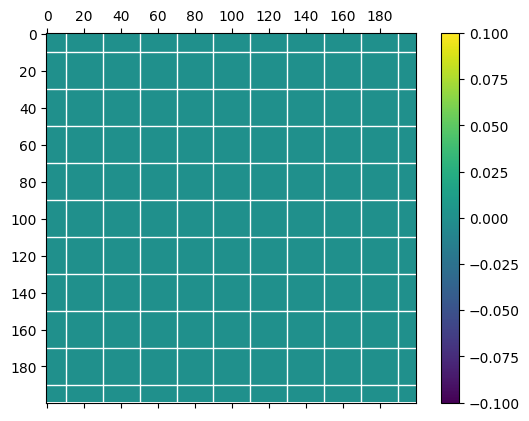

In [4]:
import numpy as np
grid = np.zeros((200,200))
visualize_large_grid(grid)

In [5]:
import numpy as np
#------------------------------------------
def rotateZ(vec,theta):
    #theta in radius
    #vector dim = (2,1)
    vec = vec.reshape((2,1))
    RoatMat = np.array([[np.cos(theta)   ,   -np.sin(theta)   ],
                        [np.sin(theta)   ,    np.cos(theta)   ]])
    RoatMat = RoatMat.reshape((2,2))
    return RoatMat @ vec
#-----------------------------------------
def coordinateToGridIndex(x: float, y: float,dim:int):
    #in:  x,     y, dim
    #out: row, col, msg
    row_max=dim
    col_max=dim
    if(x >= row_max or y >= row_max or x < 0 or y < 0):
        print("[Error] index out of range")
        return None,None,-1
    row = round(row_max - 1 - y)
    col = round(x)
    return row,col,1
def coordinateToGridIndex_withAnchor(x: float, y: float,dim:int, anchor_x=-2, anchor_y=-2):
    #in:  x,     y, dim
    #out: row, col, msg
    row_max=dim
    col_max=dim
    x = x-anchor_x
    y = y-anchor_y
    if(x >= row_max or y >= row_max or x < 0 or y < 0):
        print("[Error] index out of range")
        return None,None,-1
    row = round(row_max - 1 - y)
    col = round(x)
    return row,col,1

def girdIndexToCoordinates(row:int, col:int, dim:int):
    #in: row,  col, dim
    #out: x , y, msg
    if(row > dim-1 or col > dim-1 or row < 0 or col < 0):
        print("[Error] index out of range")
        return None,None,-1  
    x = col
    y = dim -1-row  
    return x,y,1
def girdIndexToCoordinates_withAnchor(row:int, col:int, dim:int,anchor_x=-2, anchor_y=-2):
    #in: row,  col, dim
    #out: x , y, msg
    if(row > dim-1 or col > dim-1 or row < 0 or col < 0):
        print("[Error] index out of range")
        return None,None,-1  
    x = col
    y = dim -1-row 
    
    x=x+anchor_x
    y=y+anchor_y
     
    return x,y,1
def lineToGridIndexList(p1:np.array,p2:np.array, dim:int, step=0.5):
    #out: list of index pair
    v12 = p2-p1
    v12_mag = np.linalg.norm(v12)
    v12_norm =  v12 / np.linalg.norm(v12)
    
    index_list =[]
    i = 0
    
    row,col,msg = coordinateToGridIndex(p1[0],p1[1],dim)
    if(msg == -1):
        return None, -1
    
    row_prev,col_prev = row,col
    index_list.append(np.array([row,col]))
    print("row:{0} ; col:{1}".format(row,col))
    while(v12_mag >= np.linalg.norm(i * v12_norm) ):
        p = i * v12_norm + p1
        row,col,msg = coordinateToGridIndex(p[0],p[1],dim)
        if(msg == -1):
            return None, -1
        i = i+1
        if(row_prev == row and col_prev == col):
            # print("same")
            continue
        else:
            row_prev=row
            col_prev=col
            index_list.append(np.array([row,col]))
            # print("row:{0} ; col:{1}".format(row,col))    
    return index_list,1   

def circleToGridIndexList(center:np.array, radius:float, dim: int,step=0.5):
    d_theta = step/radius # in rad
    
    
    vec_radial = radius * np.array([1,0])
    index_list = []
    i = 0
    
    p = center + vec_radial
    
    # print(p[0])
    # print(p[1])
    row,col,msg = coordinateToGridIndex(p[0],p[1],dim)
    if(msg == -1):
        return None, -1
    
    row_prev,col_prev = row,col
    index_list.append(np.array([row,col]))
    # print("row:{0} ; col:{1}".format(row,col))
    
    while (d_theta * i < 2 * np.pi):
        p = center + rotateZ(vec_radial, d_theta*i).flatten()
        # print("point{0}".format(p))
        row,col,msg = coordinateToGridIndex(p.flatten()[0],p.flatten()[1],dim)
        if(msg == -1):
            return None, -1
        i+=1
        if(row_prev == row and col_prev == col):
            # print("same")
            continue
        else:
            row_prev=row
            col_prev=col
            # print(np.array([row,col]))
            index_list.append(np.array([row,col]))   
    
    return index_list,1  
    
     
def fillGirdWithIndex(index_list,grid):
    for indexPair in index_list:
        row=indexPair[0]
        col=indexPair[1]
        if(grid[row][col]==0):
            grid[row][col]=1
            # print("fill row{0} col{1} num{2}".format(row,col,1))
        elif(grid[row][col]==1):
            grid[row][col]=1
            #Collide!!
            # print("fill row{0} col{1} num{2}".format(row,col,2))
    return grid

       
             
    
    
    


Test coordinateToGridIndex(x,y,dim)

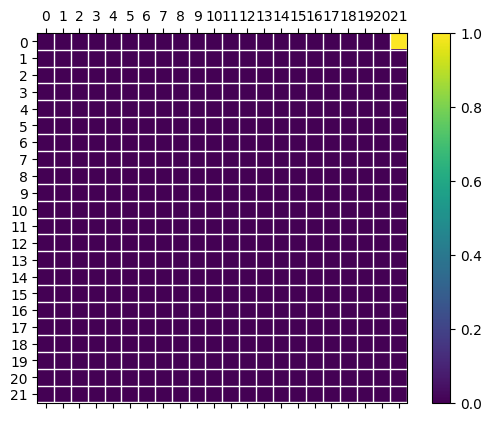

In [6]:
   
dim=22
row_max=dim
col_max=dim
grid = np.zeros((row_max,col_max))

x = 19
y = 19
#coordinate to the grid index
row,col,msg = coordinateToGridIndex_withAnchor(x,y,dim)

grid[row][col]=1
visualize_grid(grid)

Test girdIndexToCoordinates()

In [7]:
x,y,msg = girdIndexToCoordinates(19,19,20)
print(x)
print(y)

19
0


Test Line to grid index and fill grid with index

row:20 ; col:1
row:20 ; col:0


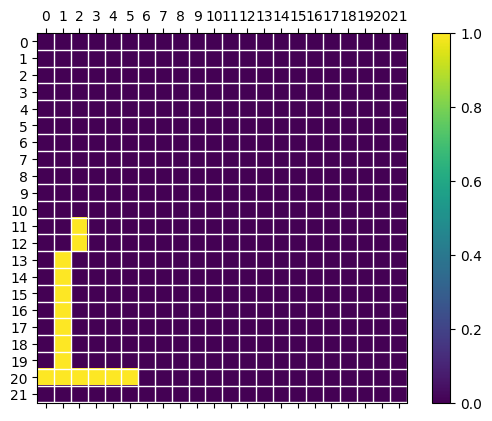

In [8]:
grid = np.zeros((row_max,col_max))
p1 = np.array([1,1])
p2 = np.array([1.6,10])
index_list, msg = lineToGridIndexList(p1,p2, dim=dim, step=0.5)
# print(index_list)
grid = fillGirdWithIndex(index_list,grid)

p1 = np.array([0,1])
p2 = np.array([5,1])
index_list, msg = lineToGridIndexList(p1,p2, dim=dim, step=0.5)
# print(index_list)
grid = fillGirdWithIndex(index_list,grid)
visualize_grid(grid)

Test circle to index list

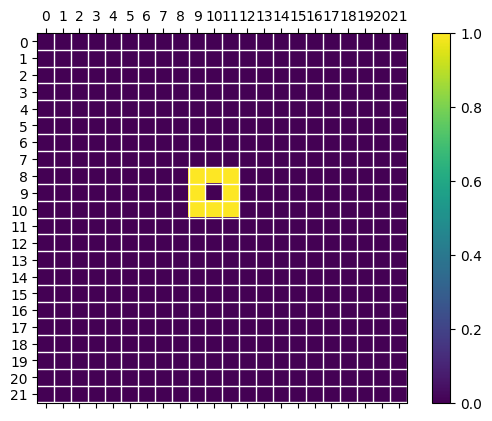

In [9]:
grid = np.zeros((row_max,col_max))
center = np.array([10,10])
radius = 1.1
index_list, msg = circleToGridIndexList(center, radius, dim=20,step=0.5)
grid = fillGirdWithIndex(index_list,grid)
visualize_grid(grid)

In [10]:


import matplotlib
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
print(matplotlib.get_backend())


from dataclasses import dataclass, replace

from typing import List, Tuple, Any, Sequence

import numpy as np
from geometry import SE2value



from pdm4ar.exercises_def.ex06.structures import (
    Polygon,
    GeoPrimitive,
    Point,
    Segment,
    Circle,
    Triangle,
    Path,
)
%matplotlib inline
def check_collision(p_1: GeoPrimitive, p_2: GeoPrimitive) -> bool:
    pass

def fillGeoPrimitive(geo:GeoPrimitive, grid):
    dim=grid.shape[0]
    print("dim={0}".format(dim))
    if(type(geo)==Point):
        row,col,msg=coordinateToGridIndex(geo.x,geo.y,dim)
        if(msg==-1):
            print("[ERROR][coordinateToGridIndex]")
            return None,-1
        grid[row][col]=1
        return grid,1
    
    if(type(geo)==Segment):
        p1 = np.array([geo.p1.x,geo.p1.y])
        p2 = np.array([geo.p2.x,geo.p2.y])
        index_list, msg = lineToGridIndexList(p1,p2, dim=dim, step=0.5)
        if(msg==-1):
            print("[ERROR][lineToGridIndexList]")
            return None,-1
        # print(index_list)
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
        
    if(type(geo)==Triangle):
        p1 = np.array([geo.v1.x,geo.v1.y])
        p2 = np.array([geo.v2.x,geo.v2.y])
        p3 = np.array([geo.v3.x,geo.v3.y])
        
        p_s = p1
        p_prev = p1
        for p in [p1,p2,p3]:
            if(p[0] == p_prev[0] and p[1] == p_prev[1]):
                continue
            
            index_list, msg = lineToGridIndexList(p_prev,p, dim=dim, step=0.5)
            if(msg==-1):
                print("[ERROR][lineToGridIndexList]")
                return None,-1            
            grid = fillGirdWithIndex(index_list,grid)
            
            p_prev=p
        
        #close the end point and starting point
        index_list, msg = lineToGridIndexList(p3,p_s, dim=dim, step=0.5)
        if(msg==-1):
            print("[ERROR][lineToGridIndexList]")
            return None,-1            
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
    if(type(geo)==Circle):
        center = np.array([geo.center.x,geo.center.y])
        radius = geo.radius
        index_list, msg = circleToGridIndexList(center, radius, dim=dim,step=0.5)
        if(msg==-1):
            print("[ERROR][circleToGridIndexList]")
            return None,-1
        
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
    if(type(geo)==Polygon): 
        
        p_s = np.array([geo.vertices[0].x,geo.vertices[0].y])
        p_e = np.array([geo.vertices[-1].x,geo.vertices[-1].y])
        p_prev = p_s
        for point in geo.vertices:
            p = np.array([point.x,point.y])
            if(p[0] == p_prev[0] and p[1] == p_prev[1]):
                continue
            
            index_list, msg = lineToGridIndexList(p_prev,p, dim=dim, step=0.5)
            if(msg==-1):
                print("[ERROR][lineToGridIndexList]")
                return None,-1            
            grid = fillGirdWithIndex(index_list,grid)
            
            p_prev=p
        
        #close the end point and starting point
        index_list, msg = lineToGridIndexList(p_e,p_s, dim=dim, step=0.5)
        if(msg==-1):
            print("[ERROR][lineToGridIndexList]")
            return None,-1            
        grid = fillGirdWithIndex(index_list,grid)
        return grid,1
    

module://matplotlib_inline.backend_inline


Test fillGeoPrimitiveWithIndex(geo:GeoPrimitive, grid)

dim=22
1


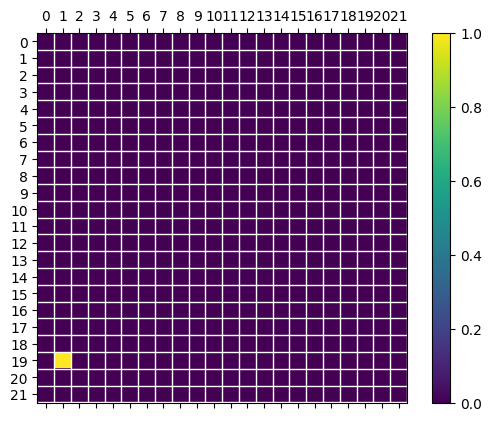

dim=22
row:19 ; col:1
1


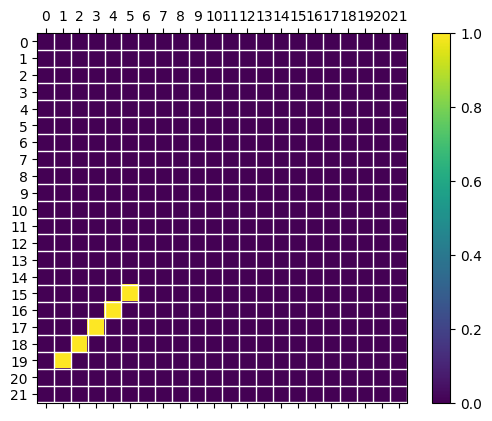

dim=22
row:19 ; col:1
row:12 ; col:8
row:15 ; col:1
1


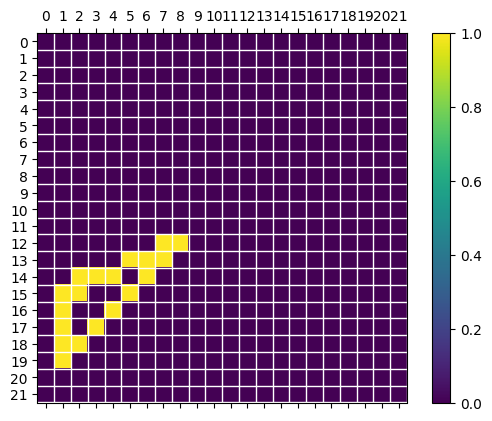

dim=22
1


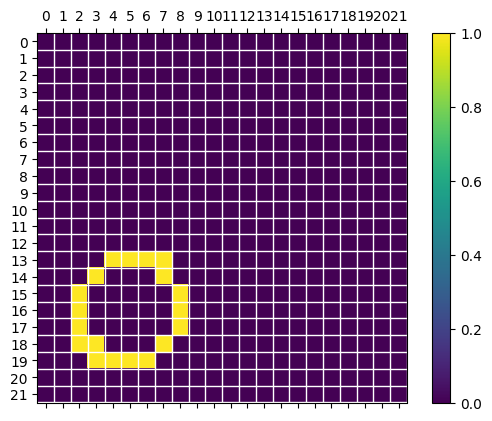

dim=22
row:19 ; col:2
row:16 ; col:2
row:16 ; col:5
row:19 ; col:5
1


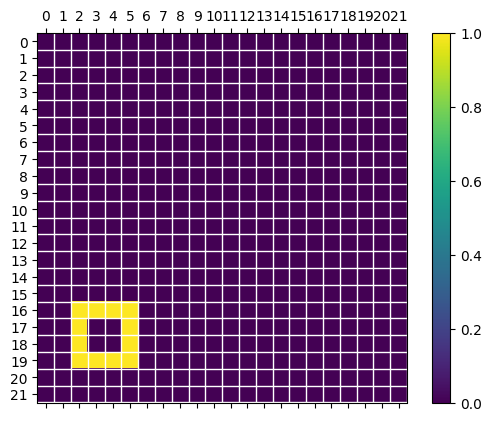

In [11]:

#test point input
grid = np.zeros((row_max,col_max))
point = Point(1,2)
grid,msg=fillGeoPrimitive(point, grid)
print(msg)
visualize_grid(grid)

#test segment input
grid = np.zeros((row_max,col_max))
grid = np.zeros((row_max,col_max))
p1 = Point(1,2)
p2 = Point(5,6)
segment = Segment(p1,p2)
grid,msg=fillGeoPrimitive(segment, grid)
print(msg)
visualize_grid(grid)

#test triangle input
grid = np.zeros((row_max,col_max))
grid = np.zeros((row_max,col_max))
p1 = Point(1,2)
p2 = Point(8,9)
p3 = Point(1,6)

tri = Triangle(p1,p2,p3)
grid,msg=fillGeoPrimitive(tri, grid)
print(msg)
visualize_grid(grid)

#test Circle input 
grid = np.zeros((row_max,col_max))
circle = Circle(center=Point(5,5),radius=3.)
grid,msg=fillGeoPrimitive(circle,grid)
print(msg)
visualize_grid(grid)

#test polygon input 
grid = np.zeros((row_max,col_max))
vertices=[]
vertices.append(Point(2,2))
vertices.append(Point(2,5))
vertices.append(Point(5,5))
vertices.append(Point(5,2))
poly = Polygon(vertices=vertices)
grid,msg=fillGeoPrimitive(poly,grid)
print(msg)
visualize_grid(grid)


In [12]:
def pointToNumpy(point:Point):
    return np.array([point.x,point.y])
def numpyToPoint(p:np.array):
    return Point(p[0],p[1]) 

In [13]:
print(pointToNumpy(Point(1,2)))
print(numpyToPoint(np.array([1,2])))

[1 2]
Point(x=1, y=2)


In [14]:
def checkLineSegmentCollisionWithGrid(p1:np.array,p2:np.array,grid, dim:int, step=0.5)->bool:
    #out: list of index pair
    v12 = p2-p1
    v12_mag = np.linalg.norm(v12)
    v12_norm =  v12 / np.linalg.norm(v12)
    

    i = 0
    
    row,col,msg = coordinateToGridIndex(p1[0],p1[1],dim)
    if(msg == -1):
        print(["[Error][checkLineSegmentCollisionWithGrid]"])
        return None
    
    row_prev,col_prev = row,col

    print("row:{0} ; col:{1}".format(row,col))
    while(v12_mag >= np.linalg.norm(i * v12_norm) ):
        p = i * v12_norm + p1
        row,col,msg = coordinateToGridIndex(p[0],p[1],dim)
        if(msg == -1):
            print(["[Error][checkLineSegmentCollisionWithGrid]"])
            return None
        i = i+1
        if(row_prev == row and col_prev == col):
            # print("same")
            continue
        elif(abs(row_prev-row)==1 and abs(col_prev-col)==1):
            if(grid[row][col]==1 or grid[row+1][col]==1 or grid[row-1][col]==1 or grid[row][col+1]==1 or grid[row][col-1]==1):
                return True
        else:
            row_prev=row
            col_prev=col
            if(grid[row][col]==1):
                return True

                
                
   
    return False 

dim=22
row:19 ; col:1
1


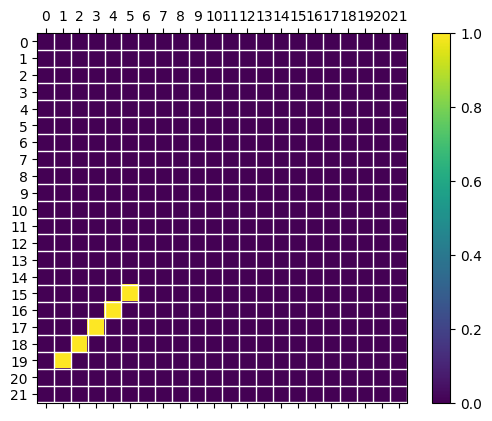

row:16 ; col:1
True
dim=22
row:16 ; col:1
1


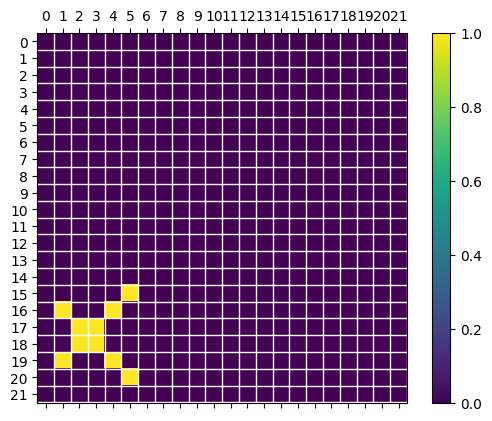

In [15]:
#test segment collision
grid = np.zeros((row_max,col_max))
p1 = Point(1,2)
p2 = Point(5,6)
segment = Segment(p1,p2)
grid,msg=fillGeoPrimitive(segment, grid)
print(msg)
visualize_grid(grid)

p3 = np.array([1,5])
p4 = np.array([5,1])
segment2 = Segment(numpyToPoint(p3),numpyToPoint(p4))

print(checkLineSegmentCollisionWithGrid(p3,p4,grid, dim=dim, step=0.5))

grid,msg=fillGeoPrimitive(segment2, grid)
print(msg)
visualize_grid(grid)

In [16]:
y = -0.6497741704271274
x = -0.6497741704271274
row = round(row_max - 1 - y)
col = round(x)
print(row)
print(col)

22
-1


Test the shapely module and the STRTree function

In [29]:

from shapely import STRtree
from shapely import box
from shapely import LineString as LineString_s
from shapely import Point as Point_s
from shapely import Polygon as Polygon_s
segment = LineString_s([[0,0],[0,1]])
Geos = [segment]
tree = STRtree(Geos)
tree.query(LineString_s([[-1,1],[1,0.5]]))
if(tree.query(LineString_s([[-1,1],[1,0.5]])).size==0):
    print("empty")
else:
    print("collide")

collide


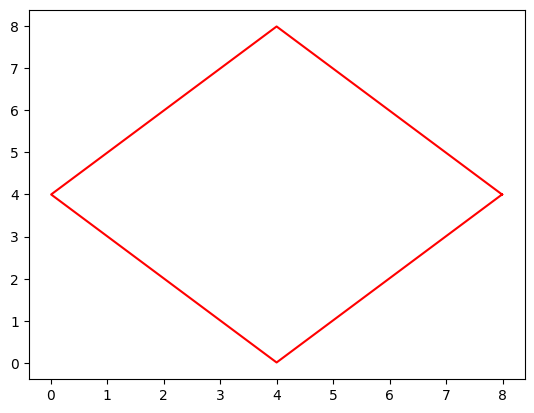

POLYGON ((7.99 4, 4 0.0099999999999998, 0.0099999999999998 3.9999999999999996, 3.999999999999999 7.99, 7.99 4))
[]
False


In [90]:
import matplotlib.pyplot as plt
circle = Polygon_s(Point_s(4,4).buffer(3.99, resolution=1))
x, y = circle.exterior.xy
plt.plot(x, y, c="red")
plt.show()

print(circle)
Geos =  [circle]
tree = STRtree(Geos)
query_geom = Point_s(2,2)
print(tree.query(query_geom, predicate="contains"))
print(circle.contains(query_geom))
    
# [o.wkt for o in tree.query(query_geom) if o.intersects(query_geom)]

In [48]:
# poly = Polygon_s(([7.99,4],[4,0.0099999999999998],[0.0099999999999998,3.9999999999999996],[3.999999999999999,7.99],[7.99,4]))
poly = Polygon_s(([8,4],[4,1],[0,4],[4,8],[8,4]))
print(poly)
Geos = [poly]
tree = STRtree(Geos)
query_geom = lineSegmentToShapelyPointList(Segment(Point(0,0),Point(1,1)))
tree.query(query_geom, predicate="contains")

POLYGON ((8 4, 4 1, 0 4, 4 8, 8 4))


array([], dtype=int64)

In [59]:
def lineSegmentToShapely(seg:Segment)->LineString_s:
    p1 = pointToNumpy(seg.p1)
    p2 = pointToNumpy(seg.p2)
    return LineString_s([p1,p2])
def triangleToShapely(tri:Triangle)->Polygon_s:
    p1 = pointToNumpy(tri.v1)
    p2 = pointToNumpy(tri.v2)
    p3 = pointToNumpy(tri.v3)
    return Polygon_s([p1,p2,p3])
def polygonToShapely(poly:Polygon)->Polygon_s:
    p_list = []
    for point in poly.vertices:
        p = pointToNumpy(point)
        p_list.append(p)
    return Polygon_s(p_list)
def circleToShapely(circle:Circle)->Point_s:
    center = pointToNumpy(circle.center)
    return Point_s(center).buffer(circle.radius, resolution=6)

def geosToShapely(geos:GeoPrimitive):
    if(type(geos) == Segment):
        return lineSegmentToShapely(geos)
    if(type(geos)==Triangle):
        return triangleToShapely(geos)
    if(type(geos)==Polygon):
        return polygonToShapely(geos)
    if(type(geos)==Circle):
        return circleToShapely(geos)
def lineSegmentToShapelyPointList(seg:Segment,step=0.2):
    ps = pointToNumpy(seg.p1)
    pe = pointToNumpy(seg.p2)
    vec_se = pe-ps
    dis = np.linalg.norm(pe-ps)
    vec_se_norm = vec_se/dis
    i = 0
    pointList_s = []
    while i * step <= dis:
        pointList_s.append(Point_s(ps + i * step * vec_se_norm))
        i = i + 1
    return pointList_s
    
    
    
       


     
seg = Segment(Point(0,0),Point(0,1))
tri = Triangle(Point(0,0),Point(0,1),Point(1,1))
vertices = [Point(0,0),Point(0,1),Point(1,1),Point(1,0)]
polygon = Polygon(vertices)
circle = Circle(center = Point(1,1), radius=3)

poly2 = polygonToShapely(polygon)
poly = triangleToShapely(tri)
lineS = lineSegmentToShapely(seg)
c = circleToShapely(circle)
# print(lineS)
# print(poly)   
# print(poly2)
# print(c)
print(geosToShapely(circle))

POLYGON ((4 1, 3.897777478867205 0.2235428646924378, 3.598076211353316 -0.4999999999999998, 3.121320343559643 -1.1213203435596424, 2.5000000000000004 -1.598076211353316, 1.7764571353075629 -1.8977774788672046, 1.0000000000000002 -2, 0.2235428646924381 -1.897777478867205, -0.4999999999999993 -1.598076211353316, -1.1213203435596424 -1.1213203435596428, -1.5980762113533156 -0.5000000000000009, -1.8977774788672046 0.2235428646924369, -2 0.9999999999999997, -1.897777478867205 1.776457135307561, -1.5980762113533165 2.499999999999999, -1.1213203435596437 3.1213203435596415, -0.5000000000000013 3.598076211353315, 0.2235428646924354 3.897777478867204, 0.9999999999999994 4, 1.7764571353075609 3.897777478867205, 2.4999999999999982 3.598076211353317, 3.121320343559642 3.121320343559643, 3.598076211353315 2.5000000000000013, 3.897777478867204 1.7764571353075647, 4 1))


In [60]:
seg = Segment(Point(0,0),Point(5,5))
print(lineSegmentToShapelyPointList(seg))

[<POINT (0 0)>, <POINT (0.141 0.141)>, <POINT (0.283 0.283)>, <POINT (0.424 0.424)>, <POINT (0.566 0.566)>, <POINT (0.707 0.707)>, <POINT (0.849 0.849)>, <POINT (0.99 0.99)>, <POINT (1.131 1.131)>, <POINT (1.273 1.273)>, <POINT (1.414 1.414)>, <POINT (1.556 1.556)>, <POINT (1.697 1.697)>, <POINT (1.838 1.838)>, <POINT (1.98 1.98)>, <POINT (2.121 2.121)>, <POINT (2.263 2.263)>, <POINT (2.404 2.404)>, <POINT (2.546 2.546)>, <POINT (2.687 2.687)>, <POINT (2.828 2.828)>, <POINT (2.97 2.97)>, <POINT (3.111 3.111)>, <POINT (3.253 3.253)>, <POINT (3.394 3.394)>, <POINT (3.536 3.536)>, <POINT (3.677 3.677)>, <POINT (3.818 3.818)>, <POINT (3.96 3.96)>, <POINT (4.101 4.101)>, <POINT (4.243 4.243)>, <POINT (4.384 4.384)>, <POINT (4.525 4.525)>, <POINT (4.667 4.667)>, <POINT (4.808 4.808)>, <POINT (4.95 4.95)>]


In [84]:
poly = Polygon_s(([0,0],[0,1],[1,1],[1,0],[0,0]))
print(poly)
Geos = [poly]
tree = STRtree(Geos)
query_geom = lineSegmentToShapelyPointList(Segment(Point(0,0),Point(1,1)))
index, distance = tree.query_nearest(query_geom, return_distance=True)
print(distance[distance==0].size!=0)

POLYGON ((0 0, 0 1, 1 1, 1 0, 0 0))
True


In [87]:
index_query, distance =tree.query_nearest(Point_s(-1,0), return_distance=True)
print(distance)

[1.]
